In [1]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
csv_1 = pd.read_csv(r"C:\Users\data science\CICIDS - 30 neurons\with attention and dimensionality reduction\attentionnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_1.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                       
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_1.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 


csv_1.to_csv("attentionnormalresult.csv", index=None)

In [3]:
csv_2 = pd.read_csv(r"C:\Users\data science\CICIDS - 30 neurons\75% attack\attentionabnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_2.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                         
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_2.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 

  

csv_2.to_csv("attentionabnormalresult.csv", index=None)

In [4]:
merged = csv_1.merge(csv_2,on="Label")

merged.to_csv("attention1.csv", index=False)
#result = pd.concat([csv_1, csv_2], axis=1)
out = csv_1.append(csv_2)
print(out)
out.to_csv("attention1.csv", index=False)

        Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       0.031837  0.031837  0.031837  0.031837  0.036238  0.039322  0.031837   
1       0.035108  0.032130  0.032130  0.032130  0.032130  0.032130  0.038547   
2       0.031934  0.041154  0.031934  0.031934  0.039751  0.031934  0.036542   
3       0.031406  0.032686  0.031092  0.033183  0.037234  0.036711  0.030824   
4       0.031504  0.031599  0.031504  0.032908  0.037345  0.037925  0.031504   
...          ...       ...       ...       ...       ...       ...       ...   
417411  0.031783  0.033839  0.031783  0.031783  0.031783  0.031783  0.034809   
417412  0.036590  0.041909  0.031593  0.032930  0.040715  0.031593  0.036540   
417413  0.031657  0.032798  0.031657  0.031657  0.031657  0.031657  0.033000   
417414  0.031375  0.031375  0.031375  0.031375  0.040299  0.034957  0.032991   
417415  0.032792  0.035663  0.030542  0.033036  0.030542  0.030542  0.030542   

        Feature8  Feature9  Feature10  

In [5]:
df = pd.read_csv("attention1.csv",sep=",", index_col=None)

In [6]:
X=df.drop(['Label'], axis=1).values 
y=df['Label'].values

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X,y,train_size=0.70, random_state=2)
print(len(x_train), "Training sequences",x_train.shape)
print(len(x_val), "Validation sequences",x_val.shape)
print(len(y_train), "Training sequences",y_train.shape)

1882113 Training sequences (1882113, 30)
806621 Validation sequences (806621, 30)
1882113 Training sequences (1882113,)


In [8]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [15]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

Epoch 1/20
201655/201655 [==============================] - 206s 1ms/step - loss: 0.1146 - accuracy: 0.9569 - val_loss: 0.1160 - val_accuracy: 0.9575
Epoch 2/20
201655/201655 [==============================] - 204s 1ms/step - loss: 0.1064 - accuracy: 0.9598 - val_loss: 0.0975 - val_accuracy: 0.9614
Epoch 3/20
201655/201655 [==============================] - 203s 1ms/step - loss: 0.1023 - accuracy: 0.9614 - val_loss: 0.0969 - val_accuracy: 0.9673
Epoch 4/20
201655/201655 [==============================] - 204s 1ms/step - loss: 0.0987 - accuracy: 0.9625 - val_loss: 0.1027 - val_accuracy: 0.9599
Epoch 5/20
201655/201655 [==============================] - 207s 1ms/step - loss: 0.0944 - accuracy: 0.9634 - val_loss: 0.0889 - val_accuracy: 0.9687
Epoch 6/20
201655/201655 [==============================] - 204s 1ms/step - loss: 0.0905 - accuracy: 0.9639 - val_loss: 0.0789 - val_accuracy: 0.9703
Epoch 7/20
201655/201655 [==============================] - 205s 1ms/step - loss: 0.0862 - accuracy:

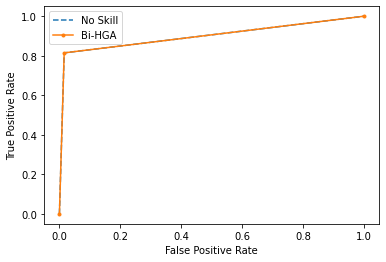

[0 0 0 ... 1 1 1]


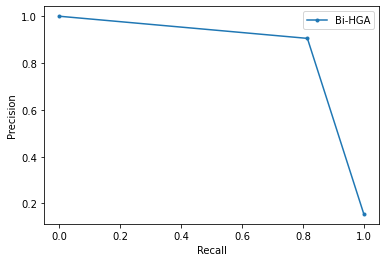

Epoch 1/20
201655/201655 [==============================] - 207s 1ms/step - loss: 0.0695 - accuracy: 0.9711 - val_loss: 0.0745 - val_accuracy: 0.9634
Epoch 2/20
201655/201655 [==============================] - 206s 1ms/step - loss: 0.0687 - accuracy: 0.9715 - val_loss: 0.0639 - val_accuracy: 0.9736
Epoch 3/20
201655/201655 [==============================] - 209s 1ms/step - loss: 0.0681 - accuracy: 0.9716 - val_loss: 0.0637 - val_accuracy: 0.9729
Epoch 4/20
201655/201655 [==============================] - 206s 1ms/step - loss: 0.0675 - accuracy: 0.9719 - val_loss: 0.0686 - val_accuracy: 0.9668
Epoch 5/20
201655/201655 [==============================] - 208s 1ms/step - loss: 0.0671 - accuracy: 0.9721 - val_loss: 0.0668 - val_accuracy: 0.9747
Epoch 6/20
201655/201655 [==============================] - 207s 1ms/step - loss: 0.0665 - accuracy: 0.9723 - val_loss: 0.0628 - val_accuracy: 0.9745
Epoch 7/20
201655/201655 [==============================] - 207s 1ms/step - loss: 0.0658 - accuracy:

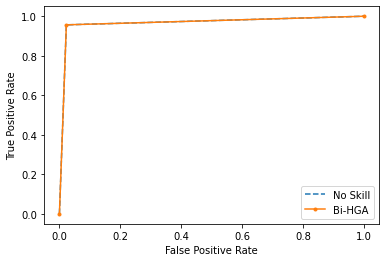

[0 0 0 ... 1 1 1]


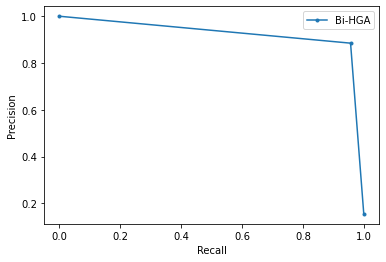

Epoch 1/20
201656/201656 [==============================] - 168s 831us/step - loss: 0.0618 - accuracy: 0.9743 - val_loss: 0.0579 - val_accuracy: 0.9760
Epoch 2/20
201656/201656 [==============================] - 163s 808us/step - loss: 0.0615 - accuracy: 0.9743 - val_loss: 0.0972 - val_accuracy: 0.9580
Epoch 3/20
201656/201656 [==============================] - 165s 820us/step - loss: 0.0614 - accuracy: 0.9744 - val_loss: 0.0594 - val_accuracy: 0.9760
Epoch 4/20
201656/201656 [==============================] - 161s 800us/step - loss: 0.0612 - accuracy: 0.9744 - val_loss: 0.0581 - val_accuracy: 0.9760
Epoch 5/20
201656/201656 [==============================] - 163s 809us/step - loss: 0.0611 - accuracy: 0.9746 - val_loss: 0.0678 - val_accuracy: 0.9739
Epoch 6/20
201656/201656 [==============================] - 165s 820us/step - loss: 0.0609 - accuracy: 0.9746 - val_loss: 0.0570 - val_accuracy: 0.9769
Epoch 7/20
201656/201656 [==============================] - 162s 805us/step - loss: 0.06

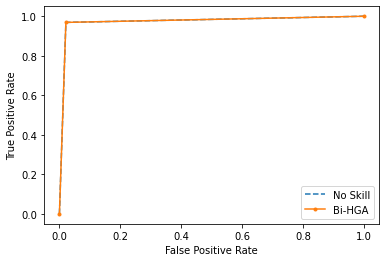

[0 0 0 ... 1 1 1]


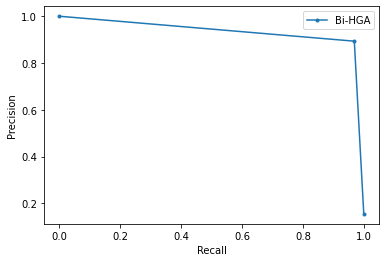

Epoch 1/20
201656/201656 [==============================] - 154s 763us/step - loss: 0.0589 - accuracy: 0.9752 - val_loss: 0.0605 - val_accuracy: 0.9739
Epoch 2/20
201656/201656 [==============================] - 160s 791us/step - loss: 0.0588 - accuracy: 0.9754 - val_loss: 0.0584 - val_accuracy: 0.9752
Epoch 3/20
201656/201656 [==============================] - 168s 832us/step - loss: 0.0586 - accuracy: 0.9754 - val_loss: 0.0577 - val_accuracy: 0.9759
Epoch 4/20
201656/201656 [==============================] - 167s 828us/step - loss: 0.0585 - accuracy: 0.9754 - val_loss: 0.0655 - val_accuracy: 0.9742
Epoch 5/20
201656/201656 [==============================] - 165s 820us/step - loss: 0.0583 - accuracy: 0.9755 - val_loss: 0.0579 - val_accuracy: 0.9750
Epoch 6/20
201656/201656 [==============================] - 166s 821us/step - loss: 0.0582 - accuracy: 0.9756 - val_loss: 0.0565 - val_accuracy: 0.9758
Epoch 7/20
201656/201656 [==============================] - 164s 812us/step - loss: 0.05

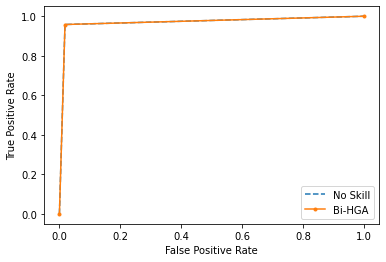

[0 0 0 ... 1 1 1]


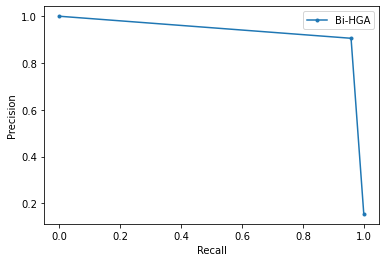

Cross Validation ROC - AUC = 0.9525423109750304
Cross Validation Precision recall curve - AUC = 0.8411657733912076
Cross Validation accuracy = 0.9718097854445583
Cross Validation f1 = 0.9094935442175702
Cross Validation precision = 0.8974206701545624
Cross Validation recall = 0.9245901819793358
Cross Validation fpr = [0.         0.01950556 1.        ]
Cross Validation tpr = [0.         0.92459018 1.        ]
Cross Validation lr_precision = [0.1552463  0.89742067 1.        ]
Cross Validation lr_recall = [1.         0.92459018 0.        ]


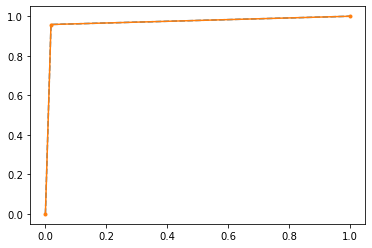

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import arange
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot 
from importlib import reload
reload(plt)
#from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


kf = KFold(n_splits=4,shuffle=True,random_state=None)

scores = []
aucs=0
aucs1=0
f1s=0
recalls=0
precisions=0
accuracys=0
lr_precisions=0
lr_recalls=0
fprs=0
tprs=0

for train_index, test_index in kf.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))
    
    # make probability predictions with the model
    predictions = model.predict(x_val)
    # round predictions 
    predictions = [round(x[0]) for x in predictions]
    
   
    # make class predictions with the model
   # predictions1 =  model.predict>0.5.astype('int32')
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X, y)
    print('overall Accuracy: %.2f' % (accuracy*100))
    
    print(confusion_matrix(y_val,predictions,labels=[1,0]))
    
    #No need for threshold setting since getting same value   
    accuracy=accuracy_score(y_val,predictions)
    print('accuracy: %f' % accuracy)
    
    f1=f1_score(y_val,predictions)
    print('f1 score: %f' % f1)    
    
    precision=precision_score(y_val,predictions)
    print('precision score: %f' % precision)
    
    recall=recall_score(y_val,predictions)
    print('recall score: %f' % recall)
    
    auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)    
    
    ns_auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)  
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    
    #https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
    fpr, tpr, _ = roc_curve(y_val, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

    print(y_val)
    #https://www.kaggle.com/vedbharti/classification-precision-recall-vs-roc-plot
    auc1=average_precision_score(y_val, predictions)
     
    lr_precision, lr_recall, _ = precision_recall_curve(y_val, predictions)
    #lr_f1, lr_auc = f1_score(y_val, predictions1), auc(lr_recall, lr_precision)
    # summarize scores
    #print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    #no_skill = len(testy[testy==1]) / len(testy)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Bi-HGA')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    aucs += auc
    aucs1 += auc1
    accuracys += accuracy
    f1s += f1
    precisions += precision
    recalls += recall
    ns_fpr+=ns_fpr
    ns_tpr+=ns_tpr
    fprs+=fpr
    tprs+=tpr
    lr_recalls+=lr_recall
    lr_precisions+=lr_precision
print("Cross Validation ROC - AUC = {}".format(aucs/4))
print("Cross Validation Precision recall curve - AUC = {}".format(aucs1/4))
print("Cross Validation accuracy = {}".format(accuracys/4))
print("Cross Validation f1 = {}".format(f1s/4))
print("Cross Validation precision = {}".format(precisions/4))
print("Cross Validation recall = {}".format(recalls/4))
print("Cross Validation fpr = {}".format(fprs/4))
print("Cross Validation tpr = {}".format(tprs/4))
print("Cross Validation lr_precision = {}".format(lr_precisions/4))
print("Cross Validation lr_recall = {}".format(lr_recalls/4))

ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
fpr, tpr, _ = roc_curve(y_val, predictions)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')


In [17]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

4h 10m 55s


In [14]:
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/#:~:text=Optimal%20Threshold%20for%20Precision%2DRecall%20Curve,-Unlike%20the%20ROC&text=Recall%20is%20calculated%20as%20the,positives%20and%20the%20false%20negatives.
#Optimal Threshold Tuning
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# predict probabilities
#yhat = model.predict_proba(x_val)
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

NameError: name 'yhat_probs' is not defined

In [ ]:
# evaluate each threshold
scores = [accuracy_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Accuracy-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [precision_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Precision-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [recall_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, recall-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
from sklearn.metrics import roc_auc_score
# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)